In [28]:
%matplotlib notebook
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

import pickle

import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter


In [29]:
#Importing Dataset
data = pd.read_csv(r'E:\Hitesh Desktop\TCS\Mentor Blogs\text_emotion.csv')

In [30]:
data.describe(include='all')

,tweet_id,sentiment,author,content
count,4.000000e+04,40000,40000,40000
unique,NaN,13,33871,39827
top,NaN,neutral,MissxMarisa,I just received a mothers day card from my lov...
freq,NaN,8638,23,14
mean,1.845184e+09,NaN,NaN,NaN
std,1.188579e+08,NaN,NaN,NaN
min,1.693956e+09,NaN,NaN,NaN
25%,1.751431e+09,NaN,NaN,NaN
50%,1.855443e+09,NaN,NaN,NaN
75%,1.962781e+09,NaN,NaN,NaN


<IPython.core.display.Javascript object>


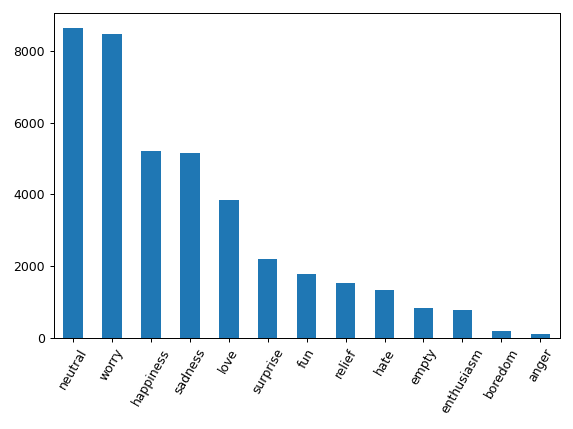

In [31]:
data['sentiment'].value_counts().plot(kind='bar', rot=60)

In [33]:
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.lancaster import LancasterStemmer


tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
stop_words = set(stopwords.words('english') + list(string.punctuation))

stemmer = LancasterStemmer()

regex_link = r'https?:\/\/.*\/\w*'
regex_ticker = r'\$\w*'
regex_punc = r'[{}]'.format(string.punctuation)




def valid_string(word):
    """Remove punctuation, stop words, and small words"""

    if word in stop_words:
        # remove stop words or punctuations
        return False
    if len(word) <= 2:
        # remove empty or very small words
        return False
    return True


def process_sentence(sentence):
    """Remove links, tickers, and tokenize sentence"""

    # remove links
    sentence = re.sub(regex_link, '', sentence)
    # remove tickers
    sentence = re.sub(regex_ticker, '', sentence)
    return tokenizer.tokenize(sentence.lower())


def process_word(word):
    """Remove all punctuation and stem words"""
    word = re.sub(regex_punc, '', word)
    return stemmer.stem(word)


def clean_sentence(sentence):
    """Clean a sentence by processesing and reforming all the words in it"""

    return ' '.join([process_word(word) for word in process_sentence(sentence) if valid_string(word)])


def encode_sentence(sentence, vocab):
    """Encode words -> ids in a sentence using a vocabulary lookup"""

    return [vocab[word] for word in sentence.split() if word in vocab]

In [34]:

# clean content (remove handles, links, punctuation, stop words, and apply stemmer)
data['clean_content'] = data['content'].apply(clean_sentence)


In [35]:
data

,tweet_id,sentiment,author,content,clean_content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit ear start freakin part
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,layin bed headach ughhh waitin cal
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,fun ceremony gloom friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,want hang friend soon
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,want trad someon houston ticket on
...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,happy moth day lov
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...,happy moth day mommy wom man long momm someon day
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,wassup beauty follow peep new hit singl wwwmys...


<IPython.core.display.Javascript object>


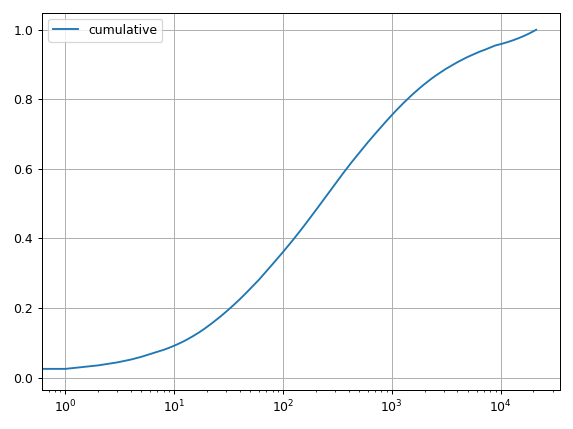

In [36]:
counter = Counter()
for _, row in data.iterrows():
    counter.update(row['clean_content'].split())
counts = pd.DataFrame(counter.most_common(), columns=['word', 'count'])
counts['cumulative'] = counts['count'].cumsum() / counts['count'].sum()

counts.plot(y='cumulative', logx=True, grid=True)
plt.show()

In [37]:
# make vocabulary lookup from top 95% of most common words
cutoff = .95
vocab = dict()
for idx, row in counts.iterrows():
    if row['cumulative'] > cutoff:
        break
    vocab[row['word']] = idx

# check vocab length
len(vocab)

8171

,tweet_id,sentiment,author,content,clean_content,encoded_content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit ear start freakin part,"[17, 2478, 55, 2646, 109, 83, 968, 355]"
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,layin bed headach ughhh waitin cal,"[6171, 80, 290, 1309, 1792, 88]"
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,fun ceremony gloom friday,"[48, 3092, 1275, 140]"
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,want hang friend soon,"[19, 343, 61, 99]"
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,want trad someon houston ticket on,"[19, 1432, 166, 1949, 369, 14]"


In [43]:
# Code to find the top 10,000 rarest words appearing in the data
freq = pd.Series(' '.join(data['content']).split()).value_counts()[-10000:]

# Removing all those rarely appearing words from the data
freq = list(freq.index)
data['clean_content'] = data['clean_content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#Encoding outputclean_ labels 'sadness' as '1' & 'happiness' as '0'
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(data.sentiment.values)

In [44]:
# Splitting into training and testing data in 90:10 ratio
X_train, X_val, y_train, y_val = train_test_split(data.content.values, y, stratify=y, random_state=42, test_size=0.1, shuffle=True)

In [45]:
# Extracting TF-IDF parameters
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.fit_transform(X_val)

In [46]:
# Extracting Count Vectors Parameters
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['content'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

In [47]:
# Model 1: Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred, y_val))
# naive bayes tfidf accuracy 0.2265

naive bayes tfidf accuracy 0.2265


In [48]:
# Model 2: Linear SVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_val_tfidf)
print('svm using tfidf accuracy %s' % accuracy_score(y_pred, y_val))
# svm tfidf accuracy 0.20125

svm using tfidf accuracy 0.20125


In [49]:
# Model 3: logistic regression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_val_tfidf)
print('log reg tfidf accuracy %s' % accuracy_score(y_pred, y_val))
# log reg tfidf accuracy 0.2323

log reg tfidf accuracy 0.2325


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
## Building models using count vectors feature
# Model 1: Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred = nb.predict(X_val_count)
print('naive bayes count vectors accuracy %s' % accuracy_score(y_pred, y_val))
# naive bayes count vectors accuracy 0.7764932562620424

naive bayes count vectors accuracy 0.31875


In [53]:
# Model 2: Linear SVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_count, y_train)
y_pred = lsvm.predict(X_val_count)
print('svm using tfidf accuracy %s' % accuracy_score(y_pred, y_val))
# svm tfidf accuracy 0.333

svm using tfidf accuracy 0.333


In [55]:
# Model 3: Logistic Regression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_count, y_train)
y_pred = logreg.predict(X_val_count)
print('log reg count vectors accuracy %s' % accuracy_score(y_pred, y_val))
# log reg count vectors accuracy 0.343

log reg count vectors accuracy 0.343


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
#Below are 8 random statements. The first 4 depict happiness. The last 4 depict sadness
 
tweets = pd.DataFrame(['My mom scolded me playing cricket',
'I was enjoying rain ysterday',
'Be Happy , Sadness is temporary',
'Enjoy each day!',
'Now this is my worst, okay? But I am gonna get better.',
'I am tiery of this busy schedule. Ishould take rest',
'His death broke my heart. It was a sad day'])
 
# Doing some preprocessing on these tweets as done before
tweets[0] = tweets[0].str.replace('[^\w\s]',' ')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets[0] = tweets[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
tweets[0] = tweets[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
 
# Extracting Count Vectors feature from our tweets
tweet_count = count_vect.transform(tweets[0])
 
#Predicting the emotion of the tweet using our already trained linear SVM
tweet_pred = lsvm.predict(tweet_count)
print(tweet_pred)
## result
## [11 8 10 5 12 8 10]

[11  8 10  5 12  8 10]
